In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
from numpy import load
import os

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

path_to_file = '/content/drive/MyDrive/CS150B/Temperatures.csv'

Mounted at /content/drive


Code From Lab

In [2]:
import pandas as pd

DATE_INDEX = 0
TEMP_INDEX = 2

def csv_reader(file):
    df = pd.read_csv(file)
    return df

def client_input():
    return input("> Please enter a filter: ")

def average_temperature(weather, filter):
    total_days = 0
    total_temp = 0.0
    for date_index, date in enumerate(weather['Date']):
        if filter in date:
            total_days+=1
            total_temp+=float(weather['Temperature'][date_index])
    return round((total_temp / total_days), 2)

def maximum_temperature(weather, filter):
    max_temp = -9999.0
    for date_index, date in enumerate(weather['Date']):
        if filter in date:
            new_temp = float(weather['Temperature'][date_index])
            if max_temp < new_temp:
                max_temp = new_temp
    return round(max_temp, 2)



def minimum_temperature(weather, filter):
    min_temp = 9999.0
    for date_index, date in enumerate(weather['Date']):
        if filter in date:
            new_temp = float(weather['Temperature'][date_index])
            if min_temp > new_temp:
                min_temp = new_temp
    return round(min_temp, 2)


def run():
    weather = csv_reader("Temperatures.csv")
    month = client_input()
    avg_temp = average_temperature(weather, month)
    print(f'Average Temperature for {month}: {avg_temp:.2f}')
    max_temp = maximum_temperature(weather, month)
    print(f'Maximum Temperature for {month}: {max_temp:.2f}')
    min_temp = minimum_temperature(weather, month)
    print(f'Minimum Temperature for {month}: {min_temp:.2f}')

weather = csv_reader(path_to_file)

Plot Avg, Min and Max Over all Months

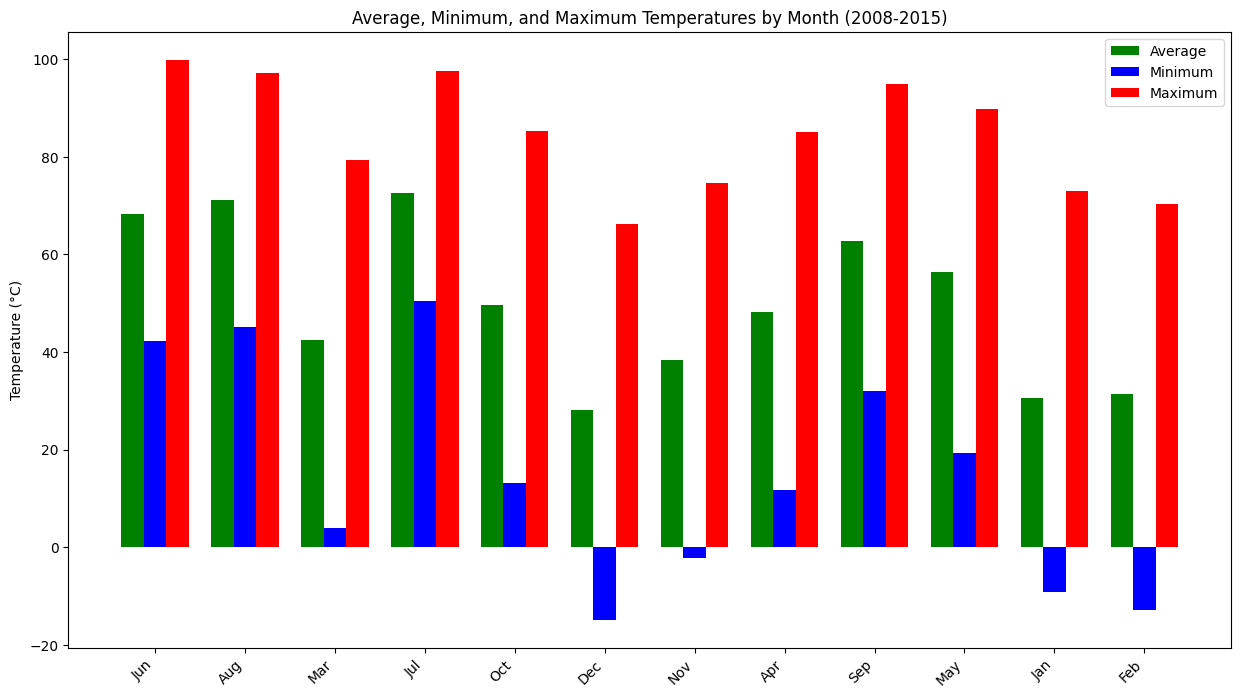

In [6]:
months = {'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'}
table = {}
for month in months:
    table[month] = {}
    table[month]['avg'] = average_temperature(weather, month)
    table[month]['max'] = maximum_temperature(weather, month)
    table[month]['min'] = minimum_temperature(weather, month)

avg_temps = [month_data['avg'] for month_data in table.values()]
min_temps = [month_data['min'] for month_data in table.values()]
max_temps = [month_data['max'] for month_data in table.values()]
# Set up the bar graph
x = np.arange(len(months))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 8))

# Plot the bars
rects1 = ax.bar(x - width, avg_temps, width, label='Average', color='g')
rects2 = ax.bar(x, min_temps, width, label='Minimum', color='b')
rects3 = ax.bar(x + width, max_temps, width, label='Maximum', color='r')

# Customize the graph
ax.set_ylabel('Temperature (°C)')
ax.set_title('Average, Minimum, and Maximum Temperatures by Month (2008-2015)')
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45, ha='right')
ax.legend()


Plot Avg, Min, and Max by Year

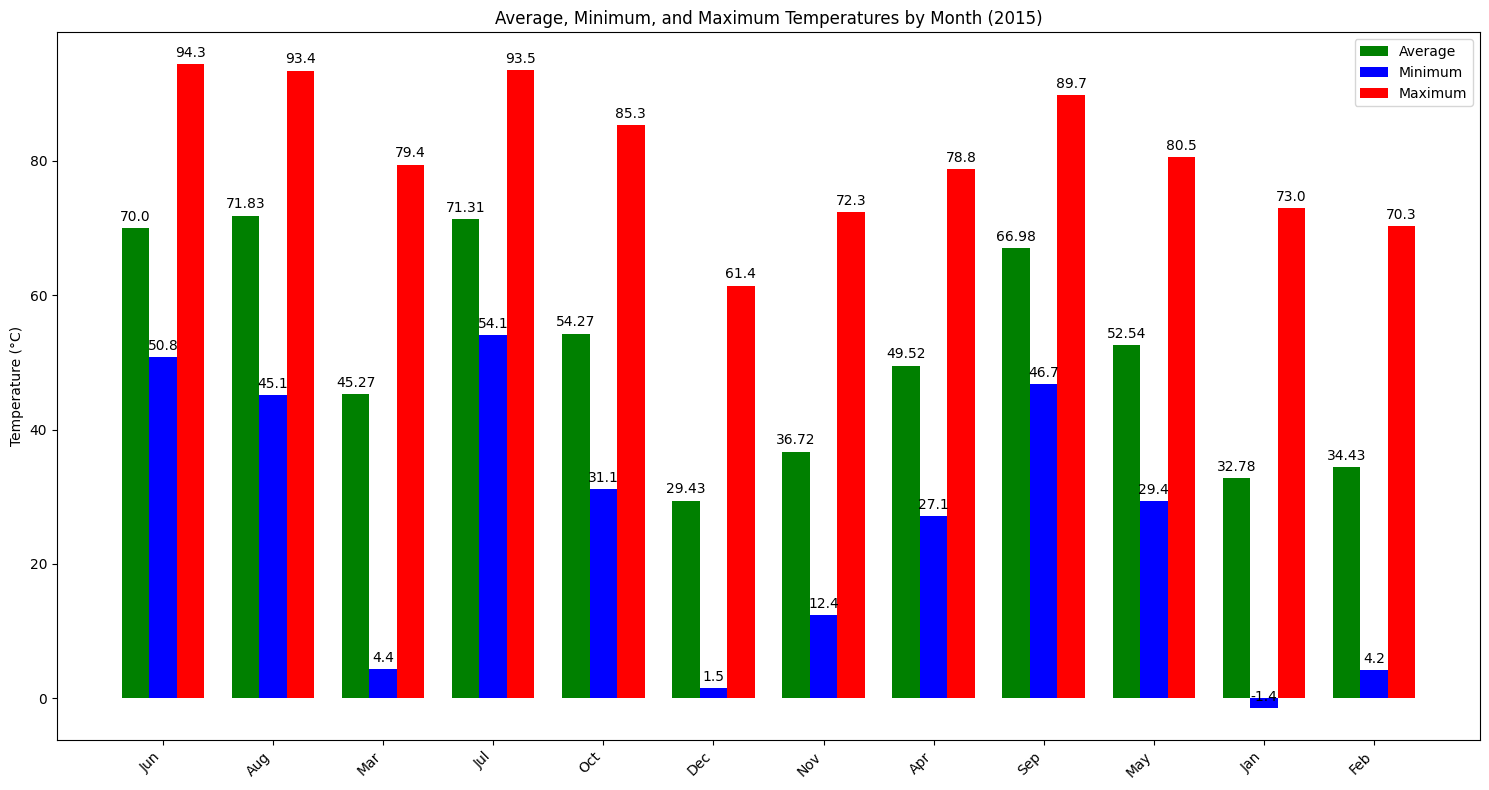

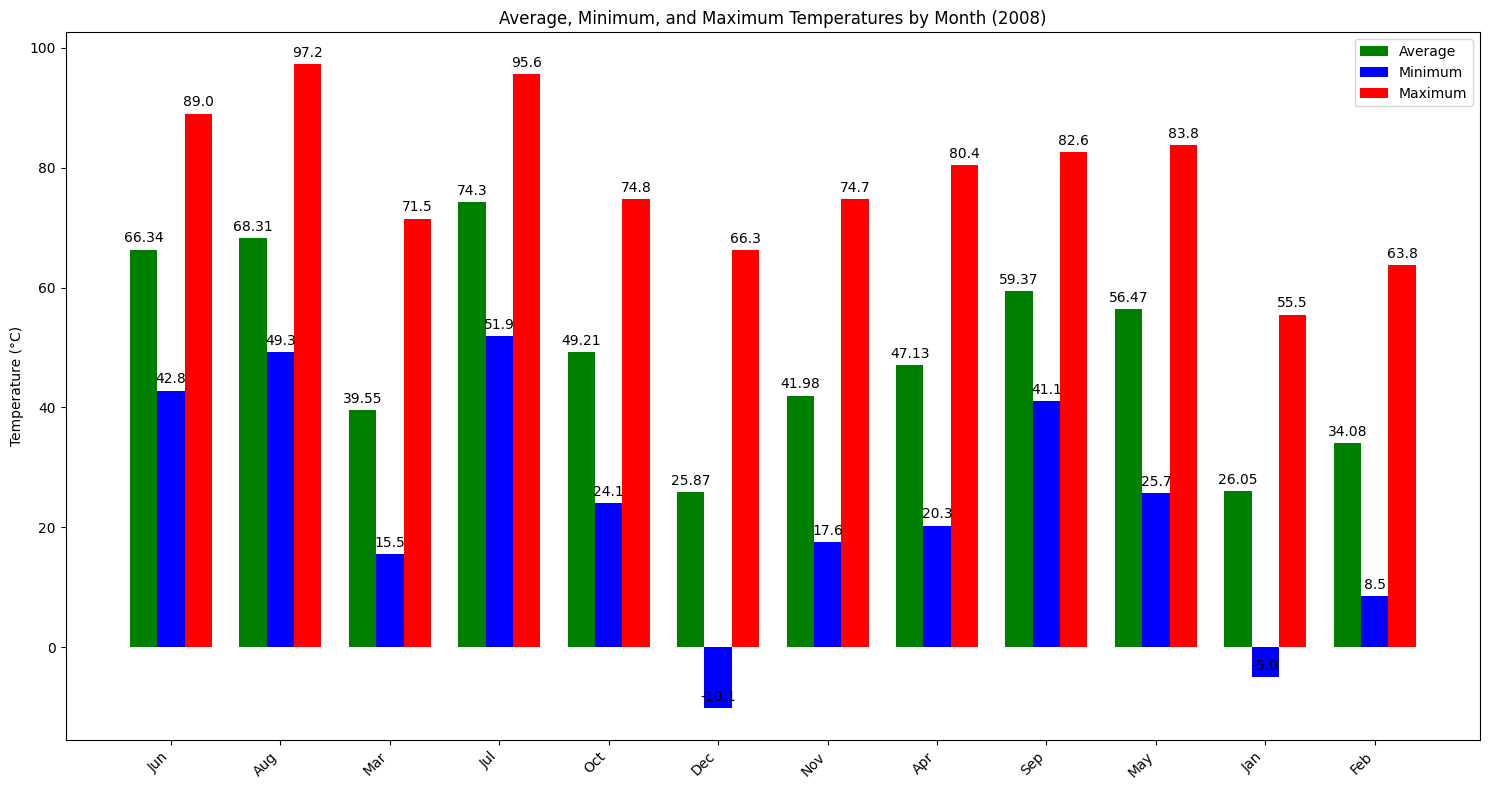

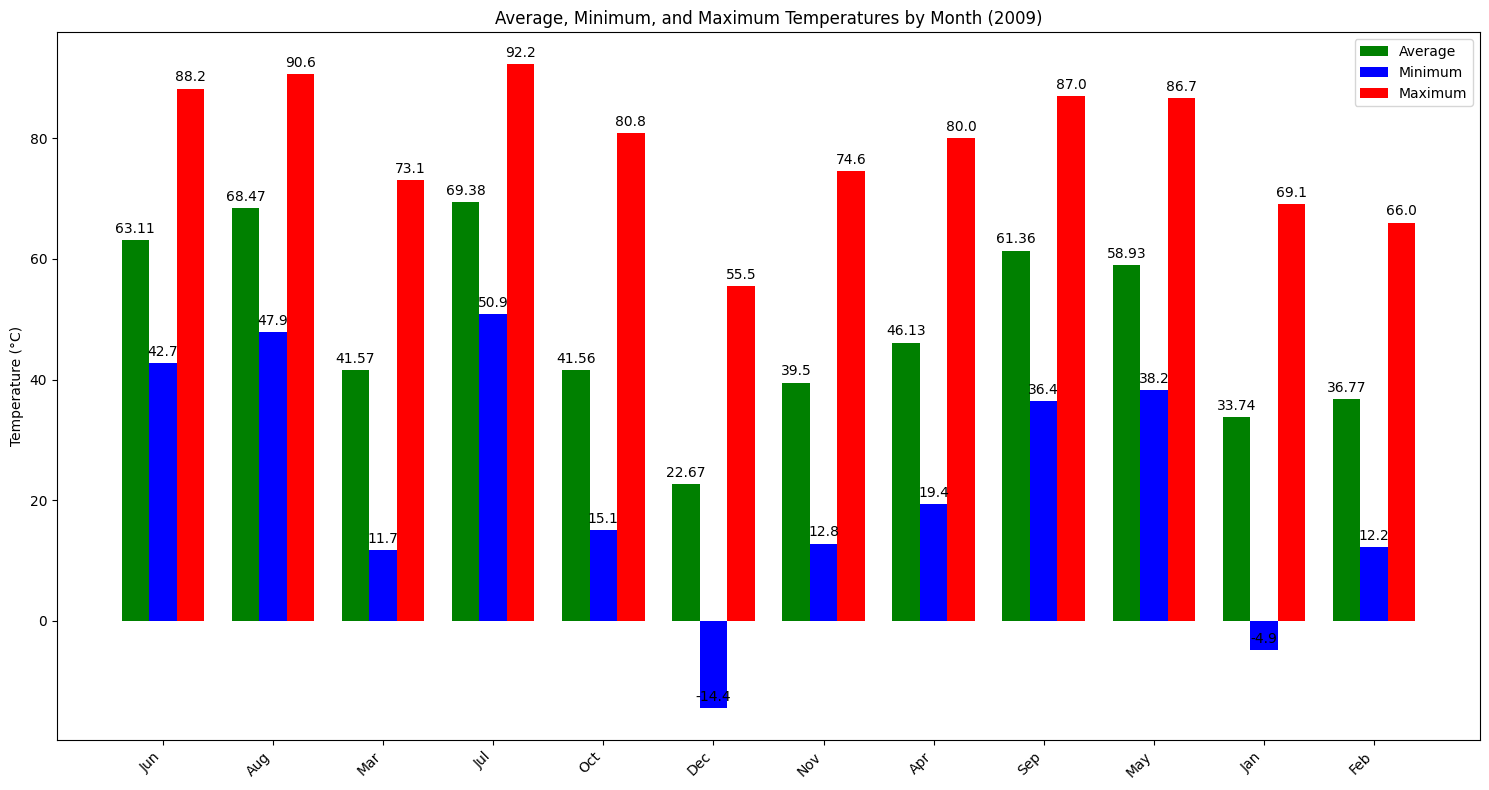

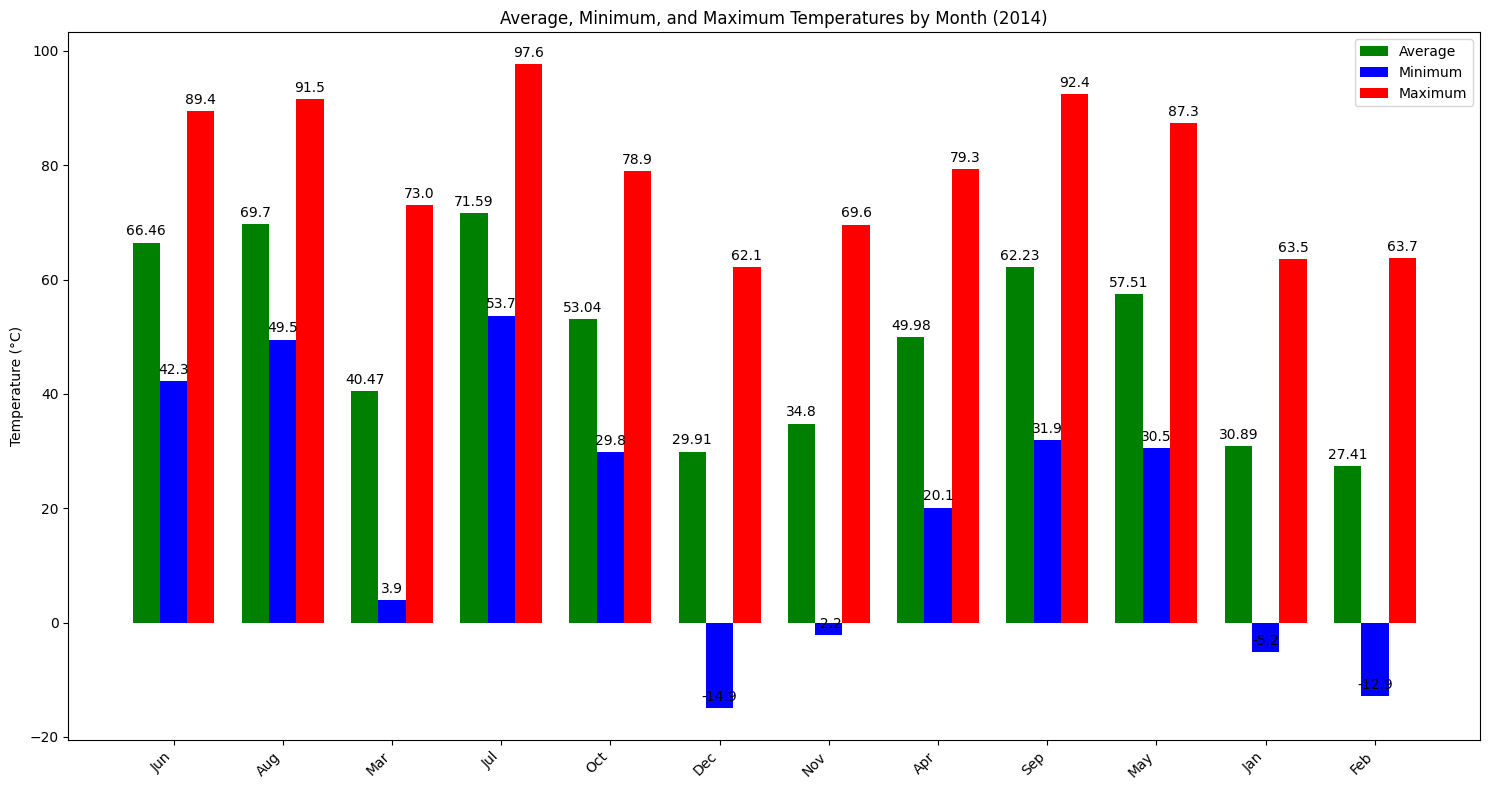

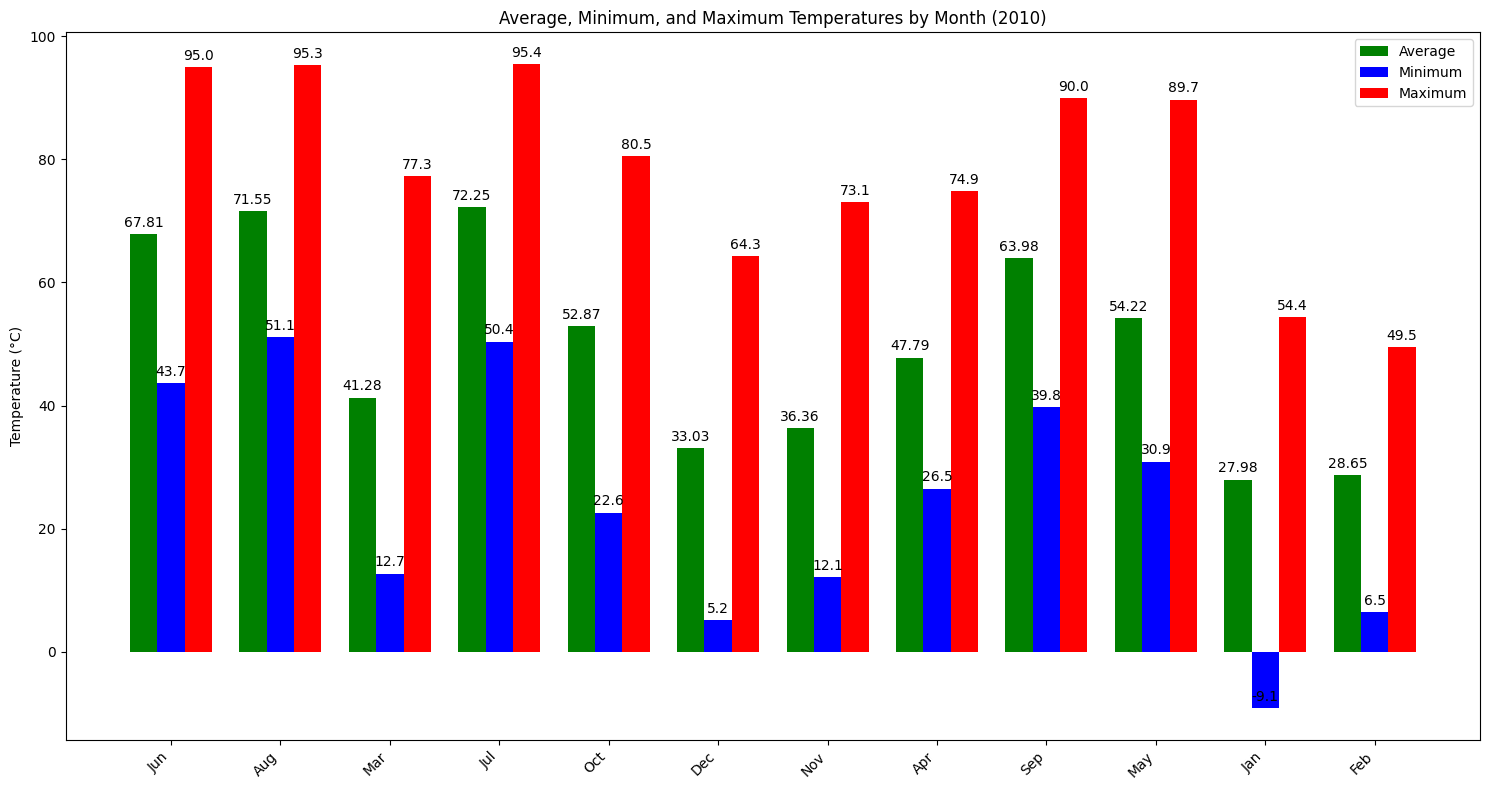

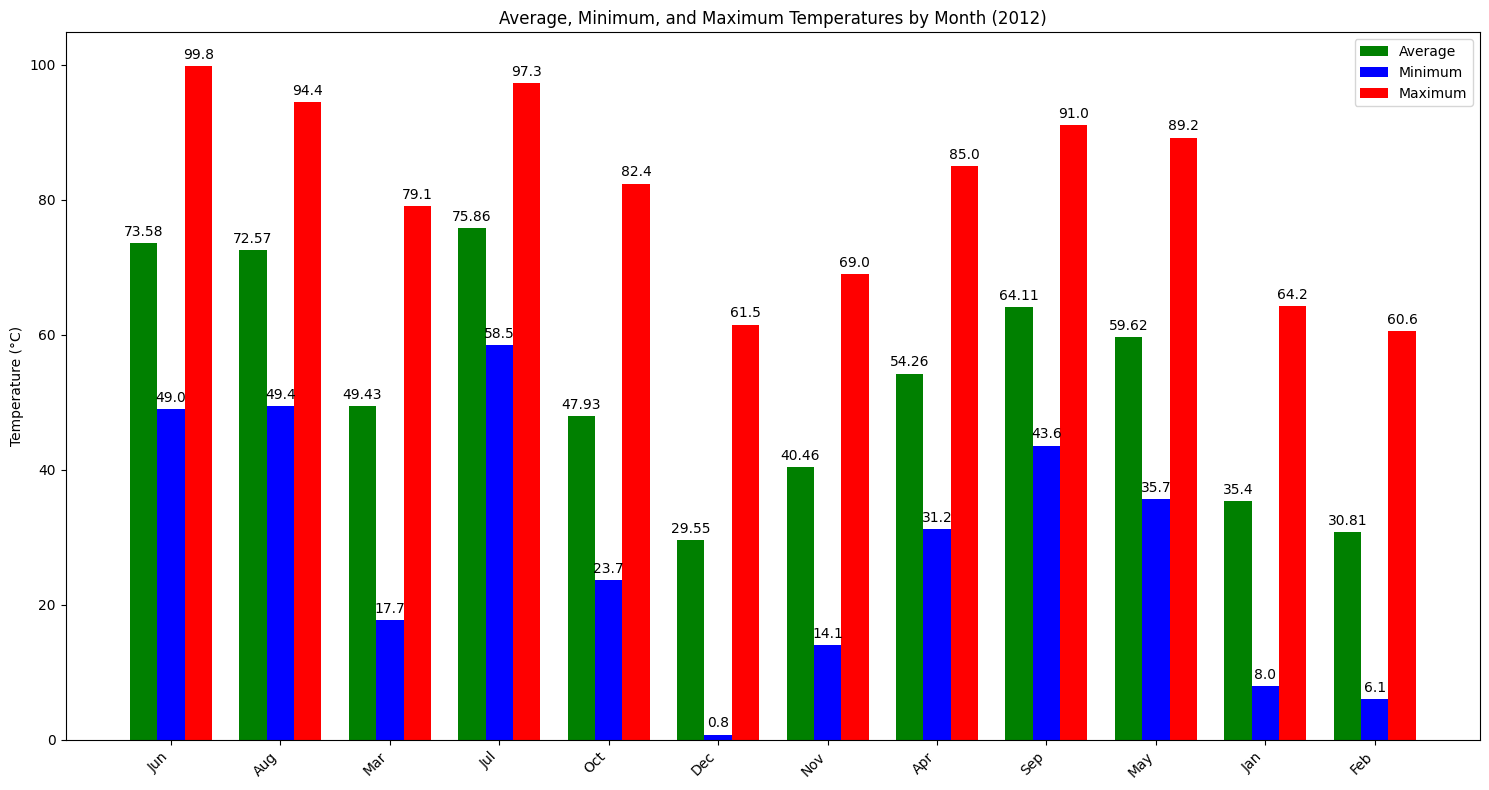

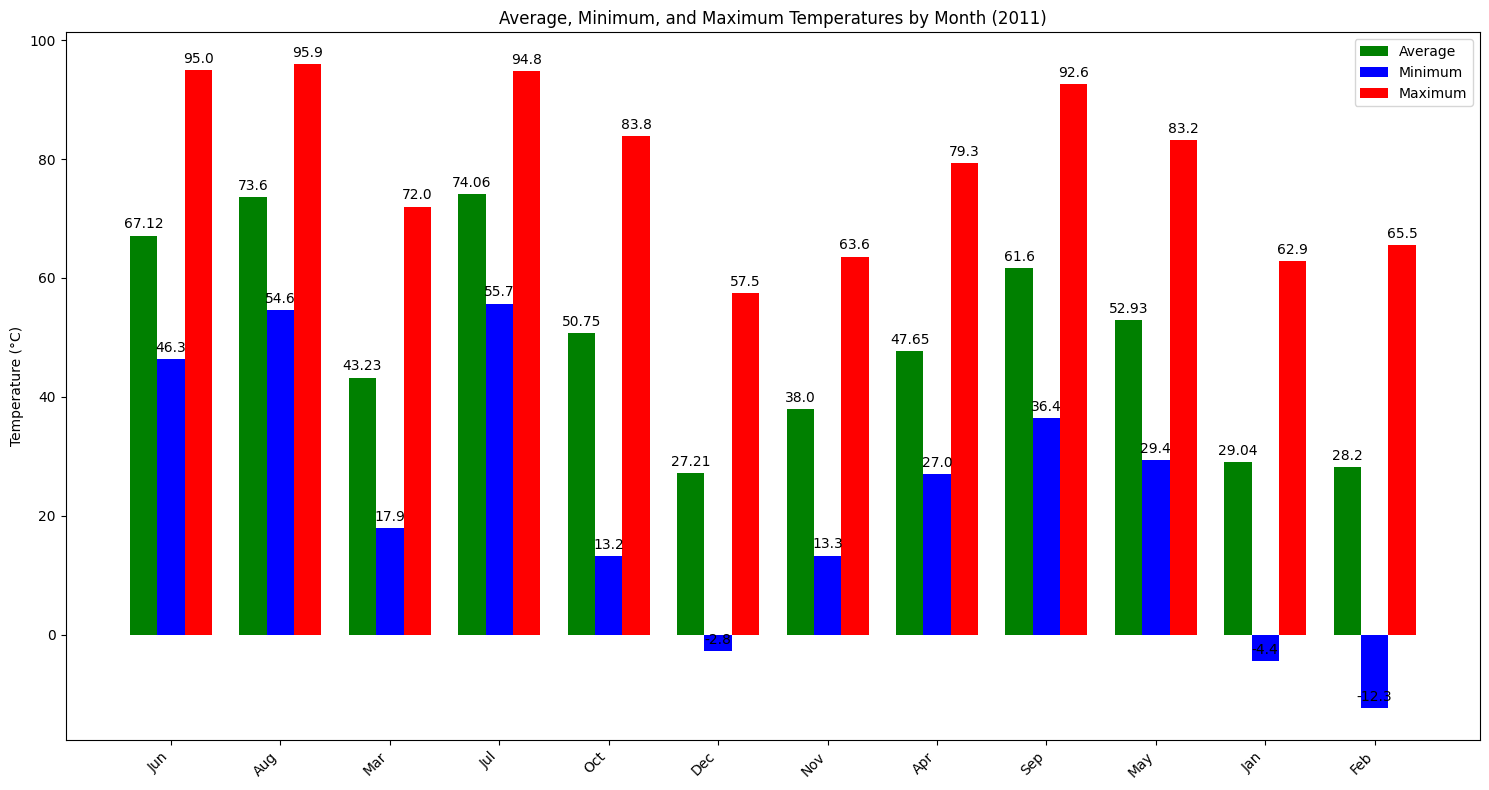

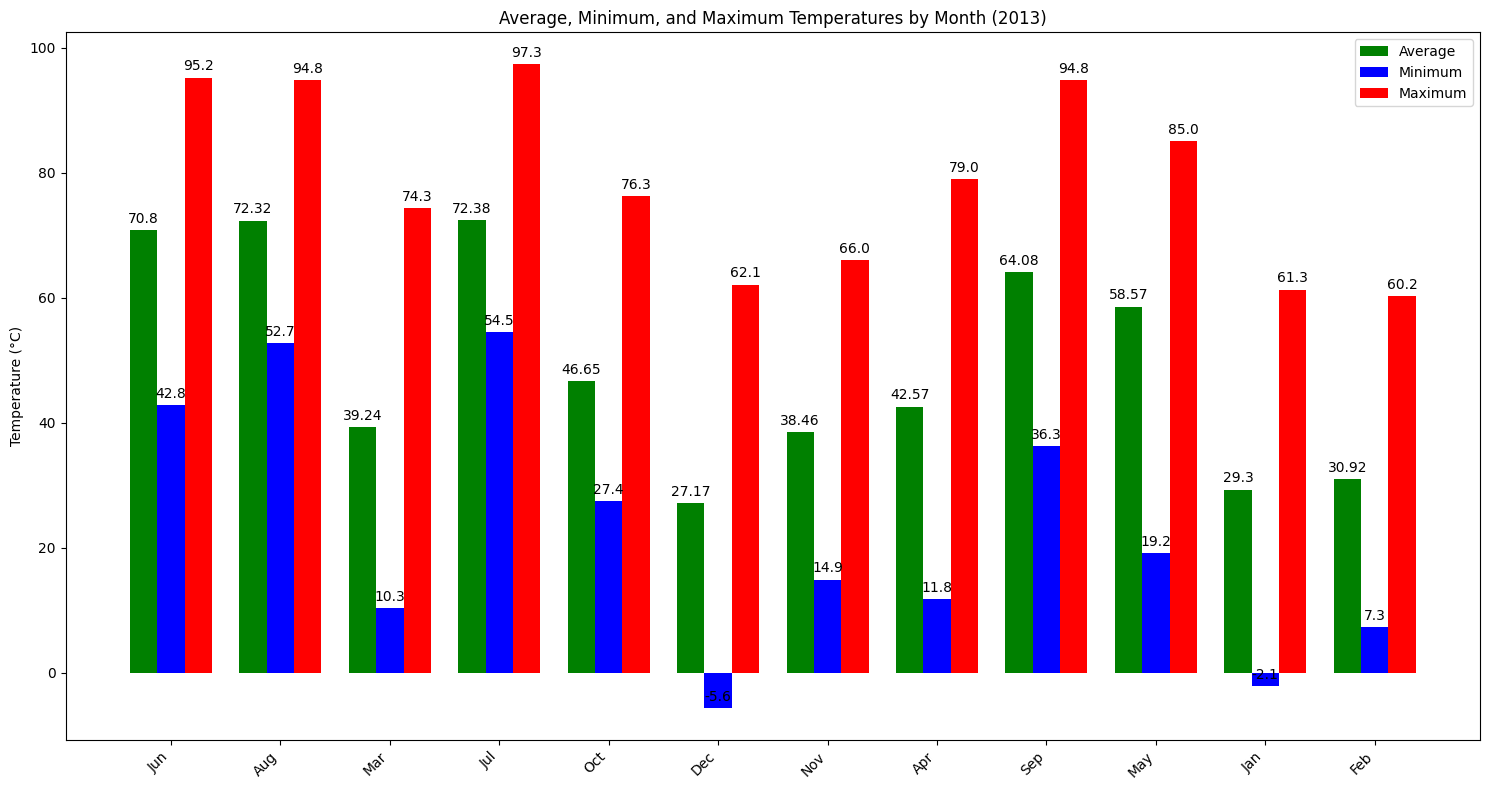

In [9]:
years = {'2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'}
months = {'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'}
data = {}
for year in years:
  data[year] = {}
  for month in months:
      filter = f'{month}-{year}'
      data[year][month] = {}
      data[year][month]['avg'] = average_temperature(weather, filter)
      data[year][month]['max'] = maximum_temperature(weather, filter)
      data[year][month]['min'] = minimum_temperature(weather, filter)

def plot_temperature_data(year_data, year):
    months = list(year_data.keys())
    avg_temps = [month_data['avg'] for month_data in year_data.values()]
    min_temps = [month_data['min'] for month_data in year_data.values()]
    max_temps = [month_data['max'] for month_data in year_data.values()]

    x = np.arange(len(months))
    width = 0.25

    fig, ax = plt.subplots(figsize=(15, 8))

    rects1 = ax.bar(x - width, avg_temps, width, label='Average', color='g')
    rects2 = ax.bar(x, min_temps, width, label='Minimum', color='b')
    rects3 = ax.bar(x + width, max_temps, width, label='Maximum', color='r')

    ax.set_ylabel('Temperature (°C)')
    ax.set_title(f'Average, Minimum, and Maximum Temperatures by Month ({year})')
    ax.set_xticks(x)
    ax.set_xticklabels(months, rotation=45, ha='right')
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    plt.tight_layout()
    plt.show()


for year in years:
  plot_temperature_data(data[year], year)



ML Predictor

In [13]:
months_dict = {'Jan': 1, 'Feb': 1, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

adjusted_weather = weather.copy()

# Convert the 'date' column to datetime if it's not already
adjusted_weather['Date'] = pd.to_datetime(adjusted_weather['Date'])

# Extract the month number and replace the date column
adjusted_weather['Date'] = adjusted_weather['Date'].dt.month

# convert time to an int
adjusted_weather['Time'] = adjusted_weather['Time'].apply(lambda x: int(x.split(':')[0]))

print(adjusted_weather)

       Date  Time  Temperature  Wind
0         1     0         20.6   4.6
1         1     1         19.8   3.4
2         1     2         18.4   2.9
3         1     3         12.2   0.5
4         1     4          8.8   0.1
...     ...   ...          ...   ...
69782    12    19         19.0   2.0
69783    12    20         17.9   2.9
69784    12    21         14.7   0.8
69785    12    22         11.9   1.0
69786    12    23         10.9   0.8

[69787 rows x 4 columns]


Model for Wind Speed Prediction

In [17]:
wind_speed_Xdata = []
wind_speed_Ydata = []

# gather a 3D vector for eavh data point as well as a scalar value for the wind speed
# these 2 vectors will be the inputs and outputs of the model
for i in range(len(adjusted_weather)):
  wind_speed_Xdata.append([adjusted_weather['Date'][i], adjusted_weather['Time'][i], adjusted_weather['Temperature'][i]])
  wind_speed_Ydata.append(adjusted_weather['Wind'][i])

wind_speed_Xdata = np.array(wind_speed_Xdata)
wind_speed_Ydata = np.array(wind_speed_Ydata)

import numpy as np

def split_data(X, y, train_ratio=0.8, val_ratio=0.2, test_ratio=0.0, random_state=None):
    """
    Split the data into training, validation, and test sets.

    Parameters:
    X (array-like): The input features
    y (array-like): The target variable
    train_ratio (float): Proportion of the data to include in the train split
    val_ratio (float): Proportion of the data to include in the validation split
    test_ratio (float): Proportion of the data to include in the test split
    random_state (int): Controls the shuffling applied to the data before applying the split

    Returns:
    X_train, X_val, X_test, y_train, y_val, y_test
    """

    # Check if the ratios sum up to 1
    assert np.isclose(train_ratio + val_ratio + test_ratio, 1.0), "Ratios must sum to 1"

    # Ensure X and y have the same number of samples
    assert len(X) == len(y), "X and y must have the same number of samples"

    # Set random state for reproducibility
    np.random.seed(random_state)

    # Get the number of samples
    num_samples = len(X)

    # Create an array of indices and shuffle it
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    # Calculate split points
    train_split = int(num_samples * train_ratio)
    val_split = train_split + int(num_samples * val_ratio)

    # Split the indices
    train_indices = indices[:train_split]
    val_indices = indices[train_split:val_split]
    test_indices = indices[val_split:]

    # Split the data
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_val, X_test, y_train, y_val, y_test



X_train, X_val, X_test, y_train, y_val, y_test = split_data(wind_speed_Xdata, wind_speed_Ydata)

model = keras.Sequential([
    keras.layers.Dense(units=3, input_shape=[3], activation='relu'),
    keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100)

Epoch 1/100
1745/1745 [==============================] - 5s 3ms/step - loss: 38.1201 - val_loss: 8.3190
Epoch 2/100
1745/1745 [==============================] - 3s 2ms/step - loss: 6.5556 - val_loss: 5.8482
Epoch 3/100
1745/1745 [==============================] - 3s 2ms/step - loss: 5.8859 - val_loss: 5.7162
Epoch 4/100
1745/1745 [==============================] - 4s 2ms/step - loss: 5.7892 - val_loss: 5.6332
Epoch 5/100
1745/1745 [==============================] - 4s 2ms/step - loss: 5.7520 - val_loss: 5.6028
Epoch 6/100
1745/1745 [==============================] - 3s 2ms/step - loss: 5.7354 - val_loss: 5.5953
Epoch 7/100
1745/1745 [==============================] - 3s 2ms/step - loss: 5.7269 - val_loss: 5.5779
Epoch 8/100
1745/1745 [==============================] - 4s 2ms/step - loss: 5.7230 - val_loss: 5.6297
Epoch 9/100
1745/1745 [==============================] - 4s 3ms/step - loss: 5.7222 - val_loss: 5.5742
Epoch 10/100
1745/1745 [==============================] - 3s 2ms/step - 